# Lab 3
## Load dataset

Load the data and use 5 percent of the total data for testing the BMI and target data.

442
len(bmi_train): 392
len(bmi_test): 50
len(target_train): 392
len(target_test): 50


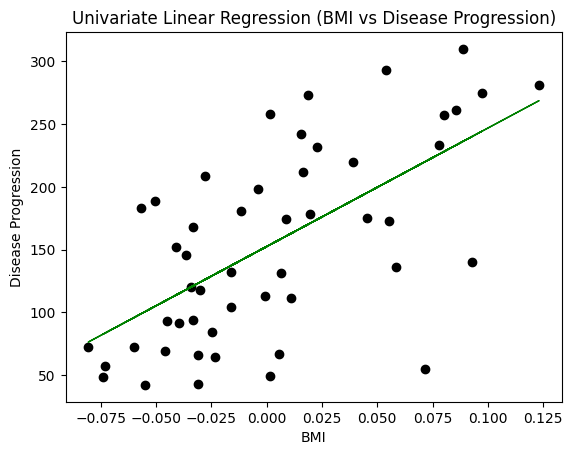

In [5]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

print(len(diabetes.data))

# Use only one feature (BMI) of the diabetes dataset containing 10 features and 1 target
bmi = diabetes.data[:, np.newaxis, 2]

number = 50 # 5 % of the total dataset for testing and training

# x = BMI, y = Disease Progression
# Split the data into training/testing sets 
bmi_train = bmi[:-number] # Use all but the last 20 samples for training
bmi_test = bmi[-number:] # Use the last 20 samples for testing

print("len(bmi_train):", len(bmi_train))
print("len(bmi_test):", len(bmi_test))

# Split the targets into training/testing sets
target_train = diabetes.target[:-number] # Use all but the last 20 samples for training
target_test = diabetes.target[-number:] # Use the last 20 samples for testing

print("len(target_train):", len(target_train))
print("len(target_test):", len(target_test))

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(bmi_train, target_train)

# Make predictions using the testing set
target_pred = regr.predict(bmi_test)

# Plot outputs
plt.scatter(bmi_test, target_test, color='black')
plt.plot(bmi_test, target_pred, color='green', linewidth=1)
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.title('Univariate Linear Regression (BMI vs Disease Progression)')
plt.show()

### Coefficients (regr.coef_): 
This is the slope of the linear regression line. It represents the change in the target variable (disease progression) for a unit change in the predictor variable (BMI).

### Intercept (regr.intercept_): 
This is the intercept of the linear regression line. It represents the value of the target variable (disease progression) when the predictor variable (BMI) is zero.

In [6]:
# Print the coefficients
print('Coefficients or slope: ', regr.coef_)  

# Print the intercept
print('Intercept: ', regr.intercept_)

# Print the coefficient of determination (R^2 score)
print('Coefficient of determination: %.2f' % r2_score(target_test, target_pred))
    

Coefficients or slope:  [945.4992184]
Intercept:  152.3348981915315
Coefficient of determination: 0.41


### Mean squared error

In [7]:
train_loss = mean_squared_error(target_train, regr.predict(bmi_train))
test_loss = mean_squared_error(target_test, target_pred)

# Print the mean squared error
print(f"Mean squared error on training set: {train_loss:.2f}")
print(f"Mean squared error on test set: {test_loss:.2f}")

# Take-aways
print("\nTake-aways from the fit:")
print("the difference between the training and test error is:", train_loss - test_loss)
if train_loss < test_loss:
    print("The model seems to be ok since the training error is lower than the test error.")
else:
    print("The model might be overfitting as the training error is higher than the test error.")

Mean squared error on training set: 3943.93
Mean squared error on test set: 3471.92

Take-aways from the fit:
the difference between the training and test error is: 472.0030138449174
The model might be overfitting as the training error is higher than the test error.


### Mean absolute error

In [8]:
# Print the mean absolute error
mean_train_loss = mean_absolute_error(target_train, regr.predict(bmi_train))
mean_test_loss = mean_absolute_error(target_test, target_pred)

print(f"Mean absolute error on training set: {mean_train_loss:.2f}")
print(f"Mean absolute error on test set: {mean_test_loss:.2f}")

# Take-aways
print("\nTake-aways from the fit:")
print("the difference between the training and test error is:", mean_train_loss - mean_test_loss)
if mean_train_loss < mean_test_loss:
    print("The model seems to be ok since the training error is lower than the test error.")
else:
    print("The model might be overfitting as the training error is higher than the test error.")

Mean absolute error on training set: 52.30
Mean absolute error on test set: 48.19

Take-aways from the fit:
the difference between the training and test error is: 4.111284162538297
The model might be overfitting as the training error is higher than the test error.
